In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

db = []

df = pd.read_csv("./tazi-se-interview-project-data.csv")
dfh = df.head(1000)
reel = []
predict = []

In [2]:
for r,m1A,m2A,m3A,m1B,m2B,m3B in zip(dfh.iloc[:,1],dfh.iloc[:,2],dfh.iloc[:,4],dfh.iloc[:,6],dfh.iloc[:,3],dfh.iloc[:,5],dfh.iloc[:,7]):
    maxiA = (m1A*0.5+m2A*0.6+m3A*0.7)/3
    maxiB = (m1B*0.5+m2B*0.6+m3B*0.7)/3
    if(maxiA > maxiB):
        predict.append(0)
    else:
        predict.append(1)

    if(r == "A"):
        reel.append(0)
    else:
        reel.append(1)

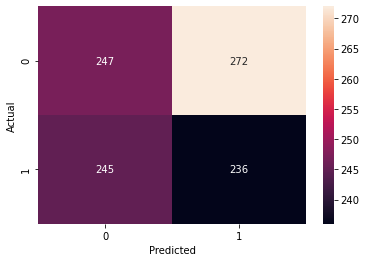

Wall time: 224 ms


In [3]:
%%time
data = {'y_Actual':    reel,
        'y_Predicted': predict
        }
matrix = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(matrix['y_Actual'], matrix['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
db.append(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

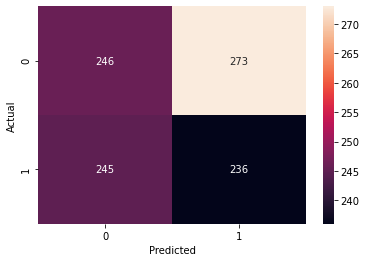

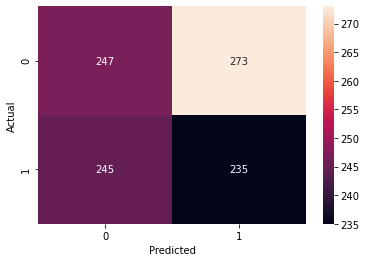

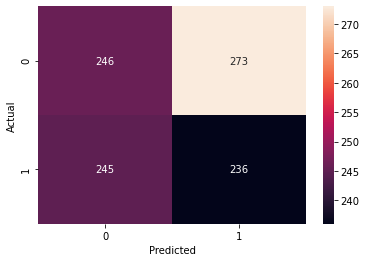

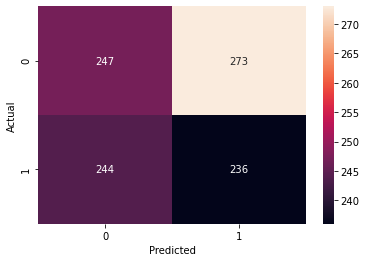

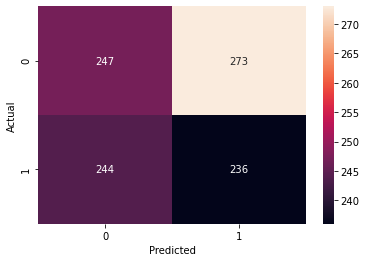

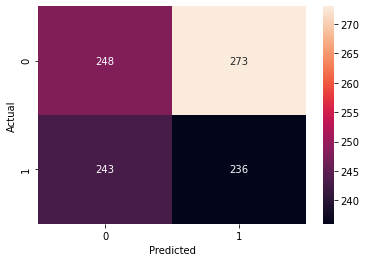

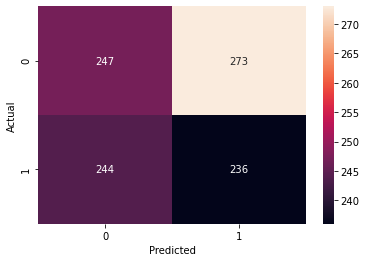

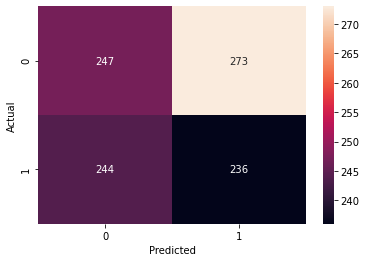

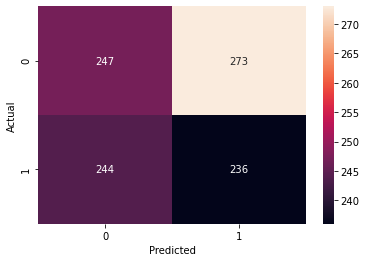

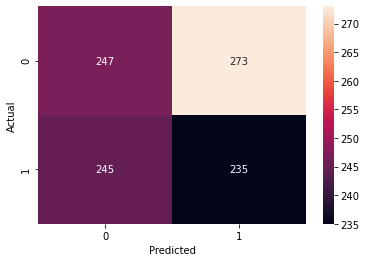

In [4]:
for i in range(1000,100000):
    j=i%1000

    oldP = predict[j] 
    oldR = reel[j]

    if(oldP == 1 and oldR == 1):
        confusion_matrix.iloc[1,1] -= 1
    elif(oldP == 1 and oldR == 0):
        confusion_matrix.iloc[0,1] -= 1
    elif(oldP == 0 and oldR == 1):
        confusion_matrix.iloc[1,0] -= 1
    elif(oldP == 0 and oldR == 0):
        confusion_matrix.iloc[0,0] -= 1

    r,m1A,m2A,m3A,m1B,m2B,m3B = df.iloc[i,1],df.iloc[i,2],df.iloc[i,4],df.iloc[i,6],df.iloc[i,3],df.iloc[i,5],df.iloc[i,7]
    maxiA = (m1A*0.5+m2A*0.6+m3A*0.7)/3
    maxiB = (m1B*0.5+m2B*0.6+m3B*0.7)/3
    if(maxiA > maxiB):
        predict[j]=0
    else:
        predict[j]=1

    if(r == "A"):
        reel[j]=0
    else:
        reel[j]=1
    
    oldP = predict[j]
    oldR = reel[j]

    if(oldP == 1 and oldR == 1):
        confusion_matrix.iloc[1,1] += 1
    elif(oldP == 1 and oldR == 0):
        confusion_matrix.iloc[0,1] += 1
    elif(oldP == 0 and oldR == 1):
        confusion_matrix.iloc[1,0] += 1
    elif(oldP == 0 and oldR == 0):
        confusion_matrix.iloc[0,0] += 1
    sn.heatmap(confusion_matrix, annot=True,fmt='d')
    plt.show()
